## Install Lib API

In [ ]:
! pip install https://dnaink.jfrog.io/artifactory/dna-ink-pypi/model-fkeywords/0.1.0/model_fkeywords-0.1.0-py3-none-any.whl

In [ ]:
! python -m spacy download pt_core_news_sm

## Import libs

In [1]:
import pandas as pd
from api_model.nlsuper import NlExtractorProcess
from api_model.nlvisualization import NlVisualization

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_26499/1571986624.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## Variables

##### Description of process
        whats_process = 'complete'
            return: process all pipeline
        whats_process = 'partial'
            return: findkeywords and process bigrams
        whats_process = 'only_keywords'
            return: findkeywords   

In [ ]:
filename = 'LIBERACAO_MARGEM'
prefix = 'CSV'
prefix_sep = '|'
column_text = 'TRANSCRICAO'
whats_process = 'complete'
#whats_process = 'partial'
#whats_process = 'only_keywords'
id_database = 'ID'
type_find = 'fixo' # aproximado

In [ ]:
text_finds = {
    'negatividade': ['a desejar', 'abrir uma reclamacao', 'absurd', 'aguento mais', 'boceta', 'bosta', 'brigaram', 'buceta', 'burocra', 'cansad', 'caralho', 'conflito', 'constrang', 'decepcao', 'decepcionad', 'quanta demora', 'que demora', 'tentando resolver', 'descontent', 'descrenca', 'descrente', 'desrespeit', 'fdp', 'filha da puta', 'filha de uma puta', 'filho da puta', 'filho de uma puta', 'frustracao', 'frustrad', 'humilhacao', 'humilhad', 'ignorad', 'ignoram', 'incompet', 'inferno', 'informa nada', 'injuria', 'ironia', 'ironic', 'irreponsaveis', 'irresponsabilidade', 'irresponsavel', 'ma vontade', 'mal a pior', 'mal atendid', 'mal educad', 'mal respondem', 'mal tratad', 'mau atendid', 'mau educad', 'mau respondem', 'mau tratad', 'merda', 'nao podemos arcar', 'nao posso arcar', 'nao sabe', 'ninguem resolve', 'ofenderam', 'ofendid', 'orrivel', 'pelo amor de deus', 'pessimo', 'pessimu', 'porra', 'poxa', 'pqp', 'puta que pariu', 'reclamacao', 'reclamar', 'ridicul', 'ruim', 'sabe nada', 'sem educacao', 'ta dificil', 'trata mal', 'trata mau', 'tratou mal', 'tratou mau', 'triste', 'vergonh', 'vagabund', 'raiva', 'detest', 'nao quero mais', 'odeio', 'safad', 'deus me livre', 'vergonh'],
    'reputacao': ['advogad', 'consumidor.gov', 'entrar com processo', 'facebook', 'instagram', 'judiciais', 'judicial', 'justica', 'meu direito', 'meus direito', 'ouvidoria', 'pequenas causas', 'processar voces', 'procon', 'reclame aqui', 'reclameaqui', 'twitter'],
    'rechamada': ['ainda nao', 'alguma posicao', 'ate agora', 'ate o momento', 'atraso', 'chamado aberto', 'consigo resolver', 'contato novamente', 'continuo sem acesso', 'de novo', 'demora', 'desde ontem', 'desde semana', 'diversas vezes', 'duas vezes', 'em andamento', 'entrei em contato', 'era pra ter', 'faz um mes', 'faz uma semana', 'ja abri', 'ja enviei', 'ja liguei', 'ja mandei', 'liguei pra central', 'mesmo erro', 'muitas vezes', 'nao chegou', 'nao e a primeira vez', 'ocorrencia aberta', 'posicionamento', 'segunda vez', 'sem sucesso', 'tentativa', 'terceira vez', 'todo dia', 'varias vezes', 'chamado aberto'],
    'satisfacao': ['adorei', 'adoro', 'ageis', 'agil', 'agilidade', 'amei', 'atendimento perfeito', 'bem atendid', 'carisma', 'diferenciad', 'educad', 'eficacia', 'eficas', 'eficaz', 'elogiar', 'elogio', 'excelente atendimento', 'feliz', 'gostei', 'impecavel', 'me ajudou', 'merito', 'motivacao', 'motivad', 'muito 10', 'muito bom', 'muito dez', 'nota 10', 'nota dez', 'otimo atendimento', 'parabenizar', 'parabens', 'pela ajuda', 'personalizad', 'preparad', 'prestativ', 'profissional', 'qualidade', 'rapidez', 'resolveu', 'satisfacao', 'satisfatori', 'satisfeit', 'solucionou', 'ate que enfim', 'ate que em fim'],
    'concorrencia': ['ifood', 'caju', 'vee', 'flash', 'bem', 'up', 'VR', 'ticket', 'alelo', 'swile'],
    'contencao': ['desculpa', 'desculpe', 'sinto muito', 'desculpe a demora', 'lamento', 'lamentamos', 'perdoa', 'perdao', 'pelo ocorrido', 'o ocorrido', 'fique tranquil'],
    'ocorrencia': ['chamado', 'ocorrencia', 'registrada com sucesso'],
    'direcionamento': ['central de atedimento', 'ligar na central', 'somente na central', 'sodexo.com', 'ligue na central'],
    'pedefacil': ['clique no', 'clique em', 'menu servicos', 'do menu', 'pede facil', 'clica no', 'clica em', 'diretamente no site', 'visualizar em', 'no menu', 'menu'],
    'ativo': ['analista pode entrar em contato', 'o analista entrara em contato', 'para te auxiliar na proposta', 'solicitei o contato', 'deixe seu contato']

          }

In [ ]:
df = NlExtractorProcess.call_process(filename, prefix, prefix_sep,\
                                     column_text, whats_process,\
                                     text_finds, id_database, type_find)

In [ ]:
df.head()

In [2]:
filename = 'LIBERACAO_MARGEM'
column_filter = 'negatividade' # deixar esse campo vazio caso queira ver tudo
column_text = 'TRANSCRICAO'
whats_process = 'trigram' # trigram or bigram

/tmp/ipykernel_26499/2555622113.py:1: DtypeWarning: Columns (15,29) have mixed types.Specify dtype option on import or set low_memory=False.
  NlVisualization.wordCloud_Topics(filename,column_filter,column_text,whats_process)


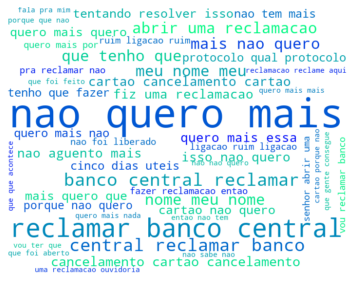

In [3]:
NlVisualization.wordCloud_Topics(filename,column_filter,column_text,whats_process)

/tmp/ipykernel_26499/997026709.py:1: DtypeWarning: Columns (15,29) have mixed types.Specify dtype option on import or set low_memory=False.
  NlVisualization.plot_10_most_common_words(filename,column_filter,column_text)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


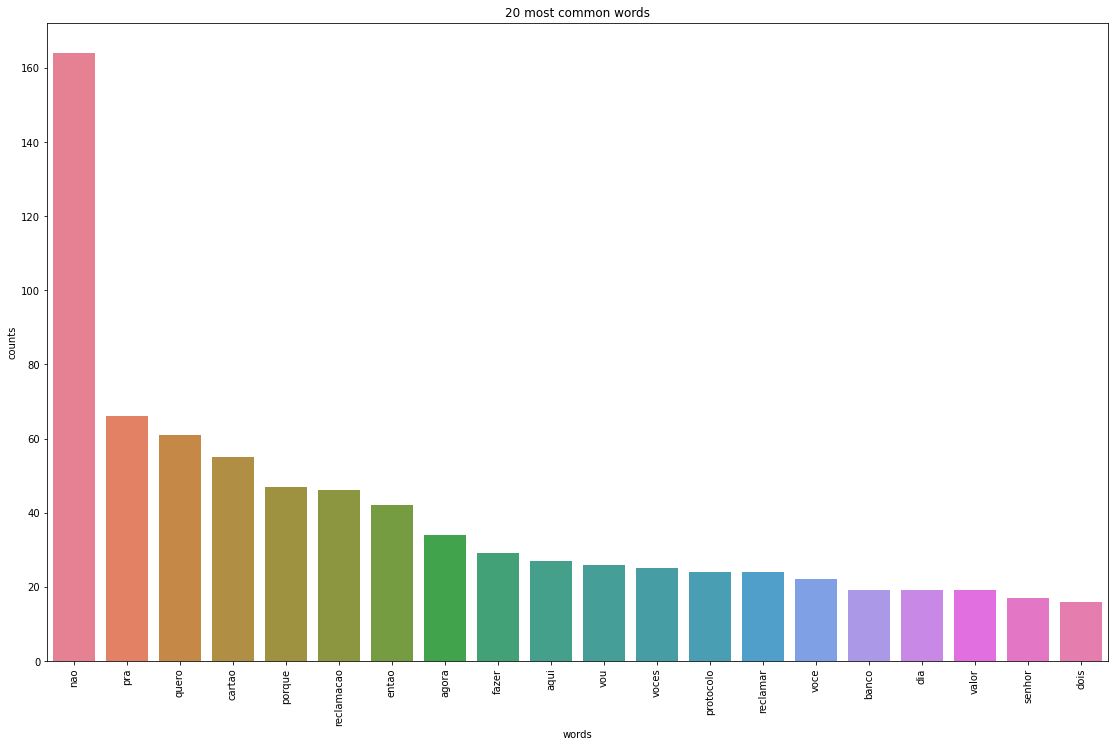

In [4]:
NlVisualization.plot_10_most_common_words(filename,column_filter,column_text)